In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
torch.manual_seed(1)

In [4]:
def model_train(model, x, y):
    max_epoch = 20000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)  
        loss = loss_func(prediction, y)
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        if epoch % 500 == 0: 
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False

        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_arr[-1])
                not_converged = False
                
    return epoch_arr, loss_arr, prediction

In [5]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1) 
print(x.shape)
y = np.sinc(5*x)
print(y.shape)

(300, 1)
(300, 1)


C:\Users\91830\AppData\Local\Temp\ipykernel_2688\1276949488.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


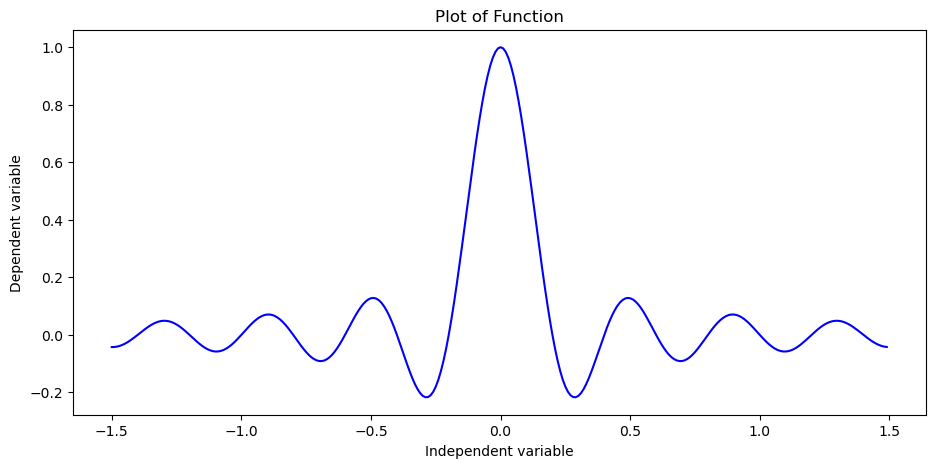

In [7]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(11,5))
plt.plot(x, y, color = "blue")
plt.title('Plot of Function')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

*********
MODEL 1
*********


In [8]:
class Model1(nn.Module):
    def __init__(self,):
        super(Model1, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))
        x = nn.functional.leaky_relu(self.linear7(x))

        x = self.predict(x)
        return x
 
model_1 = Model1()

In [9]:
optimizer = torch.optim.RMSprop(model_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_1, x, y)

571
epoch: 500, loss = 0.0050
epoch: 1000, loss = 0.0028
epoch: 1500, loss = 0.0024
epoch: 2000, loss = 0.0024
epoch: 2500, loss = 0.0025
epoch: 3000, loss = 0.0023
epoch: 3500, loss = 0.0023
epoch: 4000, loss = 0.0024
epoch: 4500, loss = 0.0022
epoch: 5000, loss = 0.0024
epoch: 5500, loss = 0.0022
epoch: 6000, loss = 0.0020
epoch: 6500, loss = 0.0020
epoch: 7000, loss = 0.0022
epoch: 7500, loss = 0.0017
epoch: 8000, loss = 0.0017
epoch: 8500, loss = 0.0019
epoch: 9000, loss = 0.0016
epoch: 9500, loss = 0.0016
epoch: 10000, loss = 0.0015
epoch: 10500, loss = 0.0017
epoch: 11000, loss = 0.0014
epoch: 11500, loss = 0.0013
epoch: 12000, loss = 0.0015
epoch: 12500, loss = 0.0015
epoch: 13000, loss = 0.0013
epoch: 13500, loss = 0.0013
epoch: 14000, loss = 0.0020
epoch: 14500, loss = 0.0014
epoch: 15000, loss = 0.0013
epoch: 15500, loss = 0.0018
epoch: 16000, loss = 0.0012
epoch: 16500, loss = 0.0014
Convergence reached for loss: 0.000998643


************
MODEL 2
************


In [10]:
class Model2(nn.Module):
    def __init__(self,):
        super(Model2, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.linear2 = nn.Linear(10, 17)
        self.linear3 = nn.Linear(17, 15)
        self.linear4 = nn.Linear(15, 4)
        self.predict = nn.Linear(4, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))

        x = self.predict(x)
        return x
 
model_2 = Model2()

In [11]:
optimizer = torch.optim.RMSprop(model_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in model_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_2, x, y)

546
epoch: 500, loss = 0.0054
epoch: 1000, loss = 0.0043
epoch: 1500, loss = 0.0027
epoch: 2000, loss = 0.0026
epoch: 2500, loss = 0.0025
epoch: 3000, loss = 0.0025
epoch: 3500, loss = 0.0026
epoch: 4000, loss = 0.0025
epoch: 4500, loss = 0.0026
epoch: 5000, loss = 0.0023
epoch: 5500, loss = 0.0026
epoch: 6000, loss = 0.0024
epoch: 6500, loss = 0.0023
epoch: 7000, loss = 0.0022
epoch: 7500, loss = 0.0021
epoch: 8000, loss = 0.0018
epoch: 8500, loss = 0.0019
epoch: 9000, loss = 0.0019
epoch: 9500, loss = 0.0018
epoch: 10000, loss = 0.0019
epoch: 10500, loss = 0.0017
epoch: 11000, loss = 0.0017
epoch: 11500, loss = 0.0018
epoch: 12000, loss = 0.0017
epoch: 12500, loss = 0.0015
epoch: 13000, loss = 0.0014
epoch: 13500, loss = 0.0014
epoch: 14000, loss = 0.0013
epoch: 14500, loss = 0.0013
epoch: 15000, loss = 0.0012
epoch: 15500, loss = 0.0013
epoch: 16000, loss = 0.0012
epoch: 16500, loss = 0.0012
epoch: 17000, loss = 0.0011
epoch: 17500, loss = 0.0012
epoch: 18000, loss = 0.0012
epoch: 1

************
MODEL 3
************


In [12]:
class Model3(nn.Module):
    def __init__(self,):
        super(Model3, self).__init__()
        self.linear1 = nn.Linear(1, 189)
        self.predict = nn.Linear(189, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))

        x = self.predict(x)
        return x
 
model_3 = Model3()

In [13]:
optimizer = torch.optim.RMSprop(model_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_3, x, y)

568
epoch: 500, loss = 0.0286
epoch: 1000, loss = 0.0201
epoch: 1500, loss = 0.0157
epoch: 2000, loss = 0.0126
epoch: 2500, loss = 0.0106
epoch: 3000, loss = 0.0093
epoch: 3500, loss = 0.0083
epoch: 4000, loss = 0.0076
epoch: 4500, loss = 0.0072
epoch: 5000, loss = 0.0068
epoch: 5500, loss = 0.0065
epoch: 6000, loss = 0.0063
epoch: 6500, loss = 0.0061
epoch: 7000, loss = 0.0060
epoch: 7500, loss = 0.0058
epoch: 8000, loss = 0.0058
epoch: 8500, loss = 0.0057
epoch: 9000, loss = 0.0056
epoch: 9500, loss = 0.0055
epoch: 10000, loss = 0.0055
epoch: 10500, loss = 0.0054
epoch: 11000, loss = 0.0054
epoch: 11500, loss = 0.0053
epoch: 12000, loss = 0.0053
epoch: 12500, loss = 0.0052
epoch: 13000, loss = 0.0052
epoch: 13500, loss = 0.0051
epoch: 14000, loss = 0.0051
epoch: 14500, loss = 0.0051
epoch: 15000, loss = 0.0050
epoch: 15500, loss = 0.0051
epoch: 16000, loss = 0.0050
epoch: 16500, loss = 0.0050
epoch: 17000, loss = 0.0049
epoch: 17500, loss = 0.0048
epoch: 18000, loss = 0.0049
epoch: 1

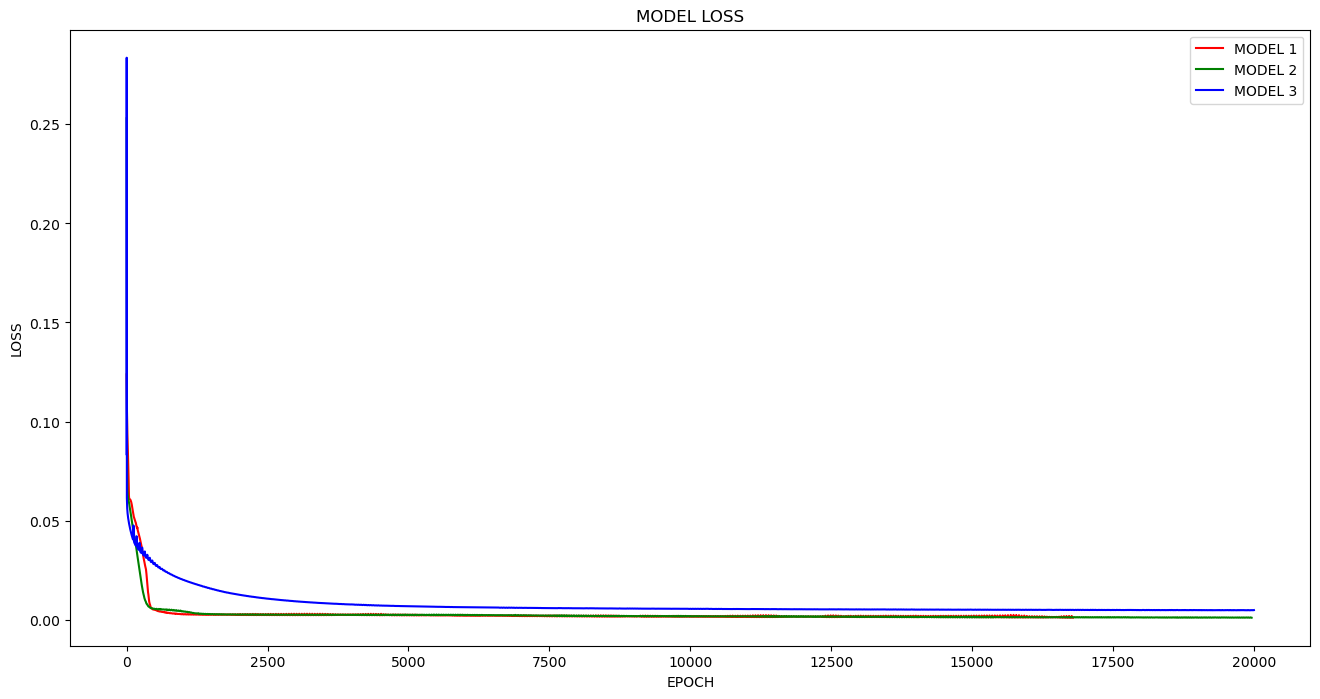

In [14]:
plt.figure(figsize=(16,8))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "b")
plt.title('MODEL LOSS')
plt.legend(['MODEL 1', 'MODEL 2','MODEL 3'])
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.show()

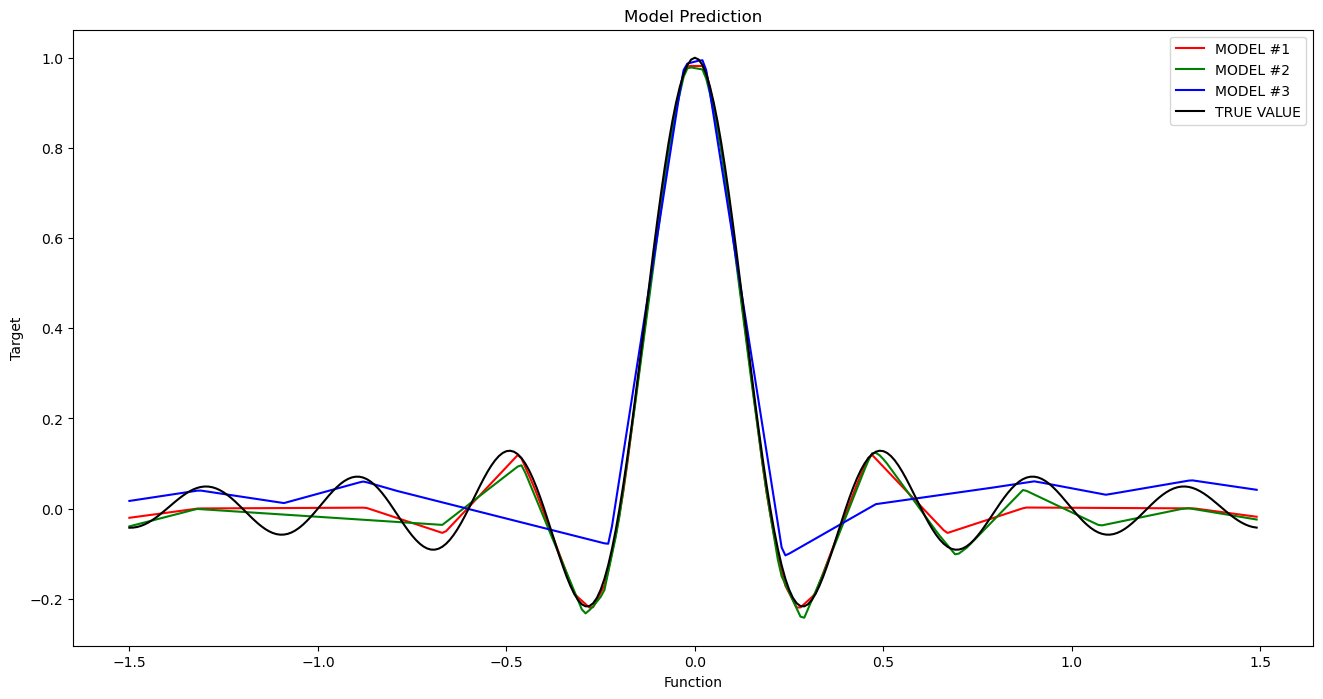

In [15]:
plt.figure(figsize=(16,8))
plt.plot(x, m1_prediction.data, color="r", label = 'MODEL #1')
plt.plot(x, m2_prediction.data, color="g", label = 'MODEL #2')
plt.plot(x, m3_prediction.data, color="b", label = 'MODEL #3')
plt.plot(x, y, color="black", label = 'TRUE VALUE')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()

In [16]:
torch.manual_seed(1)

In [17]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
print(x.shape)
y = np.sign(np.sin(5*np.pi*x))
print(y.shape)

(300, 1)
(300, 1)


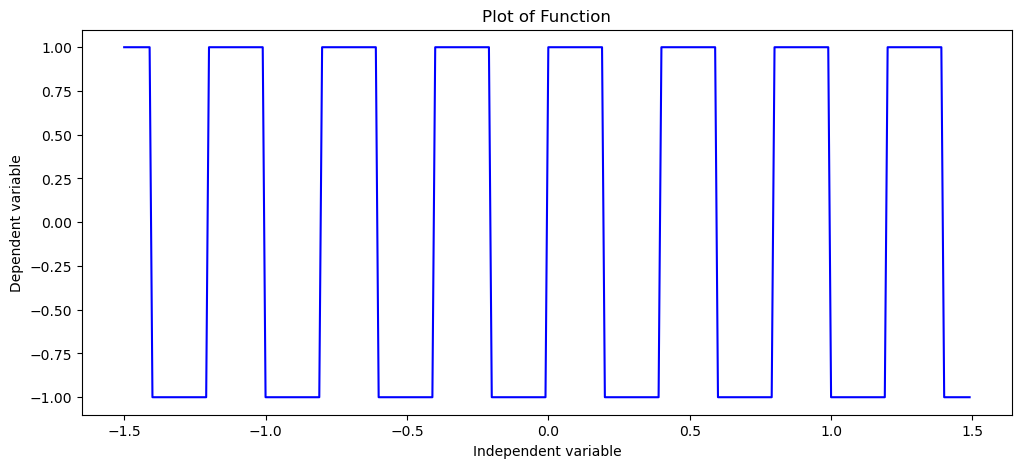

In [18]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(12,5))
plt.plot(x, y, color = "blue")

plt.title('Plot of Function')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

##########
MODEL 1
##########

In [24]:
model_sign_1 = Model1()
optimizer = torch.optim.Adam(model_sign_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in model_sign_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_sign_1, x, y)

571
epoch: 500, loss = 0.9995
epoch: 1000, loss = 0.5616
epoch: 1500, loss = 0.4956
epoch: 2000, loss = 0.4495
epoch: 2500, loss = 0.4416
epoch: 3000, loss = 0.4368
epoch: 3500, loss = 0.4376
epoch: 4000, loss = 0.4421
epoch: 4500, loss = 0.4375
epoch: 5000, loss = 0.4502
epoch: 5500, loss = 0.4328
epoch: 6000, loss = 0.4337
epoch: 6500, loss = 0.4362
epoch: 7000, loss = 0.4586
epoch: 7500, loss = 0.4404
epoch: 8000, loss = 0.4396
epoch: 8500, loss = 0.4814
epoch: 9000, loss = 0.4363
epoch: 9500, loss = 0.4799
epoch: 10000, loss = 0.4761
epoch: 10500, loss = 0.4829
epoch: 11000, loss = 0.4209
epoch: 11500, loss = 0.4169
epoch: 12000, loss = 0.4017
epoch: 12500, loss = 0.3909
epoch: 13000, loss = 0.3979
epoch: 13500, loss = 0.3834
epoch: 14000, loss = 0.3090
epoch: 14500, loss = 0.2300
epoch: 15000, loss = 0.1407
epoch: 15500, loss = 0.1341
epoch: 16000, loss = 0.0765
epoch: 16500, loss = 0.0752
epoch: 17000, loss = 0.1188
epoch: 17500, loss = 0.1070
epoch: 18000, loss = 0.1475
epoch: 1

########## MODEL 2 ##########

In [25]:
model_sign_2 = Model2()
optimizer = torch.optim.Adam(model_sign_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in model_sign_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_sign_2, x, y)

546
epoch: 500, loss = 0.9910
epoch: 1000, loss = 0.6565
epoch: 1500, loss = 0.5793
epoch: 2000, loss = 0.5644
epoch: 2500, loss = 0.5438
epoch: 3000, loss = 0.4565
epoch: 3500, loss = 0.2845
epoch: 4000, loss = 0.2413
epoch: 4500, loss = 0.2254
epoch: 5000, loss = 0.2175
epoch: 5500, loss = 0.2108
epoch: 6000, loss = 0.2053
epoch: 6500, loss = 0.2032
epoch: 7000, loss = 0.1972
epoch: 7500, loss = 0.1295
epoch: 8000, loss = 0.0776
epoch: 8500, loss = 0.0702
epoch: 9000, loss = 0.0753
epoch: 9500, loss = 0.0665
epoch: 10000, loss = 0.0823
epoch: 10500, loss = 0.0631
epoch: 11000, loss = 0.0628
epoch: 11500, loss = 0.0638
epoch: 12000, loss = 0.0602
epoch: 12500, loss = 0.0617
epoch: 13000, loss = 0.0578
epoch: 13500, loss = 0.0591
epoch: 14000, loss = 0.0569
epoch: 14500, loss = 0.0614
epoch: 15000, loss = 0.0540
epoch: 15500, loss = 0.0664
epoch: 16000, loss = 0.0523
epoch: 16500, loss = 0.0606
epoch: 17000, loss = 0.0702
epoch: 17500, loss = 0.0501
epoch: 18000, loss = 0.0523
epoch: 1

###### MODEL 3 #########


In [26]:
model_sign_3 = Model3()
optimizer = torch.optim.Adam(model_sign_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_sign_3, x, y)

568
epoch: 500, loss = 0.9370
epoch: 1000, loss = 0.7782
epoch: 1500, loss = 0.5903
epoch: 2000, loss = 0.4379
epoch: 2500, loss = 0.3471
epoch: 3000, loss = 0.2981
epoch: 3500, loss = 0.2703
epoch: 4000, loss = 0.2529
epoch: 4500, loss = 0.2413
epoch: 5000, loss = 0.2315
epoch: 5500, loss = 0.2234
epoch: 6000, loss = 0.2157
epoch: 6500, loss = 0.2089
epoch: 7000, loss = 0.2039
epoch: 7500, loss = 0.2001
epoch: 8000, loss = 0.1960
epoch: 8500, loss = 0.1928
epoch: 9000, loss = 0.1903
epoch: 9500, loss = 0.1881
epoch: 10000, loss = 0.1860
epoch: 10500, loss = 0.1843
epoch: 11000, loss = 0.1827
epoch: 11500, loss = 0.1813
epoch: 12000, loss = 0.1800
epoch: 12500, loss = 0.1788
epoch: 13000, loss = 0.1776
epoch: 13500, loss = 0.1766
epoch: 14000, loss = 0.1744
epoch: 14500, loss = 0.1728
epoch: 15000, loss = 0.1714
epoch: 15500, loss = 0.1703
epoch: 16000, loss = 0.1693
epoch: 16500, loss = 0.1684
epoch: 17000, loss = 0.1675
epoch: 17500, loss = 0.1667
epoch: 18000, loss = 0.1659
epoch: 1

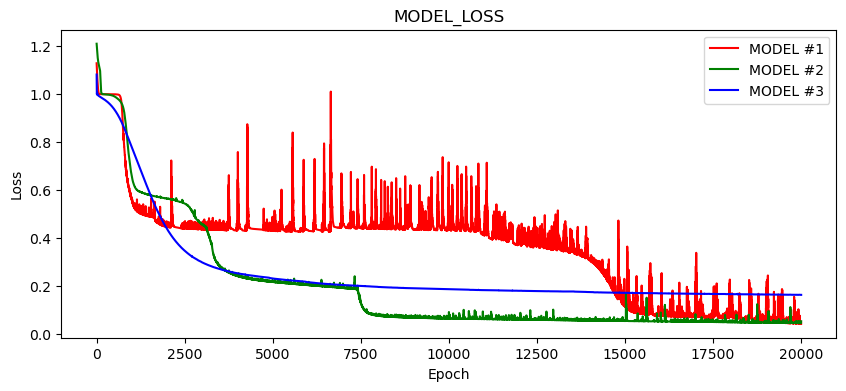

In [28]:
plt.figure(figsize=(10,4))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "b")
plt.title('MODEL_LOSS')
plt.legend(['MODEL #1', 'MODEL #2','MODEL #3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

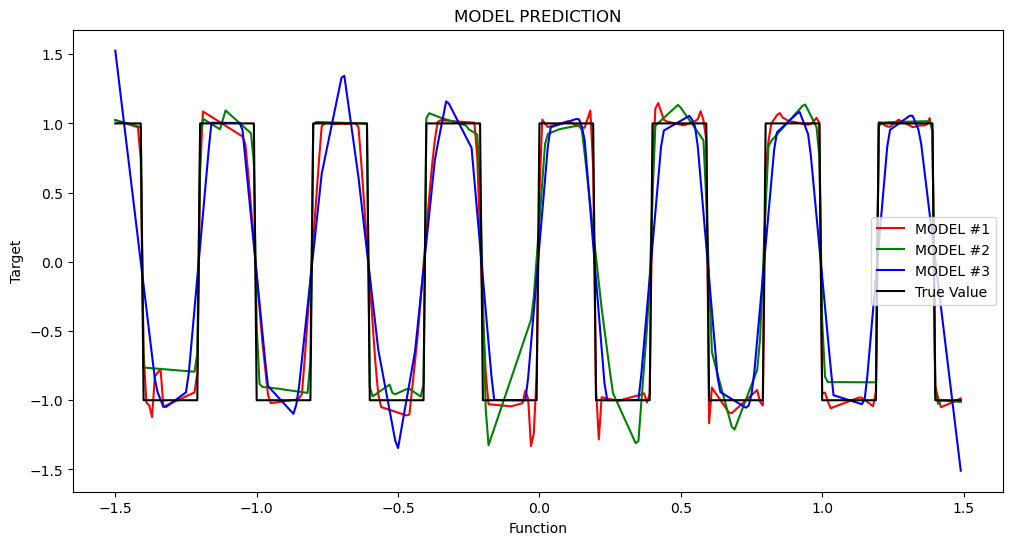

In [29]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="r", label = 'MODEL #1')
plt.plot(x, m2_prediction.data, color="g", label = 'MODEL #2')
plt.plot(x, m3_prediction.data, color="b", label = 'MODEL #3')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('MODEL PREDICTION')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()